In [56]:
import pandas as pd
import numpy as np
import os 
import statistics 
from pathlib import Path
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import math
from statsmodels.stats.anova import AnovaRM
from numpy import mean, std, cov
from numpy.random import seed, randn
import random as rd
#from sklearn import preprocessing
#from sklearn import datasets
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
from __future__ import division
import sys
import scipy
from math import sqrt
import scipy.stats as stats
from scipy import stats 
from scipy.stats import t, pearsonr, sem, spearmanr
import seaborn as sns
from statistics import mean, stdev
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import pingouin as pg
from pingouin import ttest
from scipy.special import logsumexp

In [57]:
current_dir = os.getcwd()
shortformdata = pd.read_csv('shortformdata.csv')
longformdata = pd.read_csv('longformdata.csv')
shortformdata['prop_nonsocialchoice'] = abs(shortformdata['prop_socialchoice'] - 1)
display(shortformdata)
longformdata['prop_nonsocialchoice'] = abs(longformdata['prop_socialchoice'] - 1)
display(longformdata)
aq = pd.read_csv('aq.csv')

,participant,condition_recode,salience_mean,choice,stress_mean,stress_mean.1,rej-acc,ifnegvalue,choicertmean,timebetween,...,order,overallaffect,prop_socialchoice,social_left,social_decisionprice_mean,nonsocial_decisionprice_mean,overall_decisionprice_social,overall_decisionprice_nonsocial,decision_price,prop_nonsocialchoice
0,59d5888d21977e0001d630f3,1,2.0,1.380000,7.0,7.0,-1.0,NaN,1.240000,NaN,...,NaN,7.50,0.520000,NaN,0.023077,0.025000,0.023077,0.022917,NaN,0.480000
1,59d5888d21977e0001d630f3,2,3.5,1.420000,8.0,8.0,-1.0,NaN,0.880000,NaN,...,NaN,7.50,0.520000,NaN,0.023077,0.020833,0.023077,0.022917,NaN,0.480000
2,5a09ebdf087f2e0001eae39f,1,2.5,1.580000,2.0,2.0,-1.0,NaN,1.980000,NaN,...,NaN,2.50,0.580000,NaN,0.029310,0.031905,0.029206,0.032162,NaN,0.420000
3,5a09ebdf087f2e0001eae39f,2,3.5,1.520000,3.0,3.0,-1.0,NaN,1.260000,NaN,...,NaN,2.50,0.680000,NaN,0.029118,0.032500,0.029206,0.032162,NaN,0.320000
4,5c5c451500b69200011bb8bf,1,1.5,1.340000,5.0,5.0,1.5,NaN,1.220000,NaN,...,NaN,4.25,0.660000,NaN,0.030000,0.036471,0.030312,0.032500,NaN,0.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,6711f493bfc7c4e11953872d,2,3.5,1.367347,4.0,4.0,3.0,NaN,1.020408,NaN,...,NaN,5.50,0.612245,NaN,0.029333,0.025263,0.028103,0.025610,NaN,0.387755
194,671469967e2a4f2e612e3846,1,2.0,1.520000,5.0,5.0,-2.5,NaN,1.240000,NaN,...,NaN,6.25,0.380000,NaN,0.022632,0.021935,0.021556,0.022963,NaN,0.620000
195,671469967e2a4f2e612e3846,2,4.0,1.551020,7.5,7.5,-2.5,NaN,1.326531,NaN,...,NaN,6.25,0.530612,NaN,0.020769,0.024348,0.021556,0.022963,NaN,0.469388
196,6722ca2b1f3ebd2d544608c3,1,1.5,1.480000,4.0,4.0,-2.5,NaN,1.040000,NaN,...,NaN,5.25,0.500000,NaN,0.023200,0.022800,0.022800,0.022200,NaN,0.500000


,participant,condition_recode,salience_mean,choice,stress_mean,stress_mean.1,rej-acc,ifnegvalue,choicertmean,timebetween,...,overallaffect,socialchoice,prop_socialchoice,social_left,social_decisionprice_mean,nonsocial_decisionprice_mean,overall_decisionprice_social,overall_decisionprice_nonsocial,decision_price,prop_nonsocialchoice
0,59d5888d21977e0001d630f3,1,2.0,1.38,7.0,7.0,-1.0,NaN,1.24,NaN,...,7.50,1,0.52,0.0,0.023077,0.0250,0.023077,0.022917,0.01,0.48
1,59d5888d21977e0001d630f3,1,2.0,1.38,7.0,7.0,-1.0,NaN,1.24,NaN,...,7.50,1,0.52,1.0,0.023077,0.0250,0.023077,0.022917,0.02,0.48
2,59d5888d21977e0001d630f3,1,2.0,1.38,7.0,7.0,-1.0,NaN,1.24,NaN,...,7.50,0,0.52,0.0,0.023077,0.0250,0.023077,0.022917,0.03,0.48
3,59d5888d21977e0001d630f3,1,2.0,1.38,7.0,7.0,-1.0,NaN,1.24,NaN,...,7.50,1,0.52,1.0,0.023077,0.0250,0.023077,0.022917,0.04,0.48
4,59d5888d21977e0001d630f3,1,2.0,1.38,7.0,7.0,-1.0,NaN,1.24,NaN,...,7.50,1,0.52,1.0,0.023077,0.0250,0.023077,0.022917,0.05,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,6722ca2b1f3ebd2d544608c3,2,3.5,1.48,6.5,6.5,-2.5,NaN,0.74,NaN,...,5.25,1,0.50,1.0,0.022400,0.0216,0.022800,0.022200,0.01,0.50
9645,6722ca2b1f3ebd2d544608c3,2,3.5,1.48,6.5,6.5,-2.5,NaN,0.74,NaN,...,5.25,0,0.50,0.0,0.022400,0.0216,0.022800,0.022200,0.02,0.50
9646,6722ca2b1f3ebd2d544608c3,2,3.5,1.48,6.5,6.5,-2.5,NaN,0.74,NaN,...,5.25,1,0.50,1.0,0.022400,0.0216,0.022800,0.022200,0.03,0.50
9647,6722ca2b1f3ebd2d544608c3,2,3.5,1.48,6.5,6.5,-2.5,NaN,0.74,NaN,...,5.25,0,0.50,0.0,0.022400,0.0216,0.022800,0.022200,0.04,0.50


In [60]:
shortformdata['prop_difference']= 1- shortformdata['prop_socialchoice']
print(shortformdata['prop_difference'])

longformdata['prop_difference']= 1- longformdata['prop_socialchoice']
print(longformdata['prop_difference'])

#create sepeate variables with values for within each condition
rej = shortformdata.loc[shortformdata['condition_recode']==1].reset_index(drop=True)
acc = shortformdata.loc[shortformdata['condition_recode']==2].reset_index(drop=True)

rej_long = longformdata.loc[longformdata['condition_recode']==1].reset_index(drop=True)
acc_long = longformdata.loc[longformdata['condition_recode']==2].reset_index(drop=True)

display(len(rej))
display(len(acc))
print(len(aq))

0      0.480000
1      0.480000
2      0.420000
3      0.320000
4      0.340000
         ...   
193    0.387755
194    0.620000
195    0.469388
196    0.500000
197    0.500000
Name: prop_difference, Length: 198, dtype: float64
0       0.48
1       0.48
2       0.48
3       0.48
4       0.48
        ... 
9644    0.50
9645    0.50
9646    0.50
9647    0.50
9648    0.50
Name: prop_difference, Length: 9649, dtype: float64


99

99

99


In [61]:
display(rej)

,participant,condition_recode,salience_mean,choice,stress_mean,stress_mean.1,rej-acc,ifnegvalue,choicertmean,timebetween,...,overallaffect,prop_socialchoice,social_left,social_decisionprice_mean,nonsocial_decisionprice_mean,overall_decisionprice_social,overall_decisionprice_nonsocial,decision_price,prop_nonsocialchoice,prop_difference
0,59d5888d21977e0001d630f3,1,2.0,1.38,7.0,7.0,-1.0,NaN,1.24,NaN,...,7.50,0.52,NaN,0.023077,0.025000,0.023077,0.022917,NaN,0.48,0.48
1,5a09ebdf087f2e0001eae39f,1,2.5,1.58,2.0,2.0,-1.0,NaN,1.98,NaN,...,2.50,0.58,NaN,0.029310,0.031905,0.029206,0.032162,NaN,0.42,0.42
2,5c5c451500b69200011bb8bf,1,1.5,1.34,5.0,5.0,1.5,NaN,1.22,NaN,...,4.25,0.66,NaN,0.030000,0.036471,0.030312,0.032500,NaN,0.34,0.34
3,5c9d004ee3b6c40015254526,1,2.5,1.46,3.5,3.5,0.5,NaN,2.12,NaN,...,3.25,0.50,NaN,0.022000,0.023200,0.022075,0.023191,NaN,0.50,0.50
4,5cc3f0f9fdb33500018c5eeb,1,2.0,1.50,7.0,7.0,-1.5,NaN,0.72,NaN,...,7.75,0.54,NaN,0.022593,0.021739,0.025455,0.023818,NaN,0.46,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,67094d6215b6d0fe3e8c3e39,1,2.0,1.46,9.0,9.0,2.5,NaN,1.08,NaN,...,7.75,0.64,NaN,0.038750,0.036667,0.037015,0.039394,NaN,0.36,0.36
95,670d326c55fa3d6f10ebe253,1,2.0,1.42,6.0,6.0,-1.0,NaN,1.70,NaN,...,6.50,0.56,NaN,0.030357,0.025000,0.028750,0.025455,NaN,0.44,0.44
96,6711f493bfc7c4e11953872d,1,2.0,1.42,7.0,7.0,3.0,NaN,2.00,NaN,...,5.50,0.56,NaN,0.026786,0.025909,0.028103,0.025610,NaN,0.44,0.44
97,671469967e2a4f2e612e3846,1,2.0,1.52,5.0,5.0,-2.5,NaN,1.24,NaN,...,6.25,0.38,NaN,0.022632,0.021935,0.021556,0.022963,NaN,0.62,0.62


In [15]:
display(acc)

,participant,condition_recode,salience_mean,choice,stress_mean,stress_mean.1,rej-acc,ifnegvalue,choicertmean,timebetween,...,order,overallaffect,prop_socialchoice,social_left,social_decisionprice_mean,nonsocial_decisionprice_mean,overall_decisionprice_social,overall_decisionprice_nonsocial,decision_price,prop_nonsocialchoice
0,59d5888d21977e0001d630f3,2,3.5,1.420000,8.0,8.0,-1.0,NaN,0.880000,NaN,...,NaN,7.50,0.520000,NaN,0.023077,0.020833,0.023077,0.022917,NaN,0.480000
1,5a09ebdf087f2e0001eae39f,2,3.5,1.520000,3.0,3.0,-1.0,NaN,1.260000,NaN,...,NaN,2.50,0.680000,NaN,0.029118,0.032500,0.029206,0.032162,NaN,0.320000
2,5c5c451500b69200011bb8bf,2,3.0,1.380000,3.5,3.5,1.5,NaN,1.540000,NaN,...,NaN,4.25,0.620000,NaN,0.030645,0.028947,0.030312,0.032500,NaN,0.380000
3,5c9d004ee3b6c40015254526,2,3.5,1.480000,3.0,3.0,0.5,NaN,2.280000,NaN,...,NaN,3.25,0.560000,NaN,0.022143,0.023182,0.022075,0.023191,NaN,0.440000
4,5cc3f0f9fdb33500018c5eeb,2,5.0,1.367347,8.5,8.5,-1.5,NaN,1.183673,NaN,...,NaN,7.75,0.346939,NaN,0.030000,0.025313,0.025455,0.023818,NaN,0.653061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,67094d6215b6d0fe3e8c3e39,2,4.5,1.520000,6.5,6.5,2.5,NaN,1.420000,NaN,...,NaN,7.75,0.700000,NaN,0.035429,0.042667,0.037015,0.039394,NaN,0.300000
95,670d326c55fa3d6f10ebe253,2,4.5,1.460000,7.0,7.0,-1.0,NaN,2.140000,NaN,...,NaN,6.50,0.560000,NaN,0.027143,0.025909,0.028750,0.025455,NaN,0.440000
96,6711f493bfc7c4e11953872d,2,3.5,1.367347,4.0,4.0,3.0,NaN,1.020408,NaN,...,NaN,5.50,0.612245,NaN,0.029333,0.025263,0.028103,0.025610,NaN,0.387755
97,671469967e2a4f2e612e3846,2,4.0,1.551020,7.5,7.5,-2.5,NaN,1.326531,NaN,...,NaN,6.25,0.530612,NaN,0.020769,0.024348,0.021556,0.022963,NaN,0.469388


In [62]:
print(mean(rej['social_decisionprice_mean']))
print(mean(acc['social_decisionprice_mean']))

print(mean(rej['prop_socialchoice']))
print(mean(acc['prop_socialchoice']))

0.026626701075337822
0.027324188476963576
0.5639118417395239
0.5629561888573352


In [17]:
#t-test 
rej_acc_propsoc = ttest(rej['prop_socialchoice'], acc['prop_socialchoice'], paired=True, alternative='two-sided')
print(rej_acc_propsoc)

               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  0.094787   98   two-sided  0.924678  [-0.02, 0.02]  0.006772  0.112   

          power  
T-test  0.05051  


In [18]:
#t-test for the difference in 
rej_acc_decisionprice = ttest(rej['social_decisionprice_mean'], acc['social_decisionprice_mean'], paired=True, alternative='two-sided')
print(rej_acc_decisionprice)

              T  dof alternative     p-val         CI95%   cohen-d   BF10  \
T-test -2.08442   98   two-sided  0.039723  [-0.0, -0.0]  0.145511  0.881   

           power  
T-test  0.299677  


In [19]:
#t-test for the difference in 
rej_acc_decisionprice_nonsocial = ttest(rej['nonsocial_decisionprice_mean'], acc['nonsocial_decisionprice_mean'], paired=True, alternative='two-sided')
print(rej_acc_decisionprice_nonsocial)

               T  dof alternative     p-val        CI95%  cohen-d   BF10  \
T-test  0.301762   98   two-sided  0.763473  [-0.0, 0.0]  0.03079  0.116   

           power  
T-test  0.060608  


In [20]:
#t-test for the difference in 
rej_acc_decisionprice = ttest(rej['social_decisionprice_mean'], rej['nonsocial_decisionprice_mean'], paired=True, alternative='two-sided')
print(rej_acc_decisionprice)

               T  dof alternative     p-val        CI95%  cohen-d   BF10  \
T-test -0.297859   98   two-sided  0.766441  [-0.0, 0.0]  0.02857  0.116   

           power  
T-test  0.059126  


In [21]:
#t-test for the difference in 
rej_acc_decisionprice = ttest(acc['social_decisionprice_mean'], acc['nonsocial_decisionprice_mean'], paired=True, alternative='two-sided')
print(rej_acc_decisionprice)

               T  dof alternative     p-val        CI95%  cohen-d   BF10  \
T-test  1.705204   98   two-sided  0.091324  [-0.0, 0.0]  0.14137  0.449   

           power  
T-test  0.285716  


In [22]:
#t-test for the difference in 
rej_acc_decisionprice = ttest(rej['nonsocial_decisionprice_mean'], acc['nonsocial_decisionprice_mean'], paired=True, alternative='two-sided')
print(rej_acc_decisionprice)

               T  dof alternative     p-val        CI95%  cohen-d   BF10  \
T-test  0.301762   98   two-sided  0.763473  [-0.0, 0.0]  0.03079  0.116   

           power  
T-test  0.060608  


In [23]:
#t-test for the difference in 
overall_decisionprice = ttest(shortformdata['social_decisionprice_mean'], shortformdata['nonsocial_decisionprice_mean'], paired=True, alternative='two-sided')
print(overall_decisionprice)

               T  dof alternative     p-val        CI95%   cohen-d   BF10  \
T-test  0.867722  197   two-sided  0.386602  [-0.0, 0.0]  0.055294  0.115   

           power  
T-test  0.120996  


In [24]:
#t-test for the difference in self-reported affect between rejection and acceptance
rej_acc_stress = ttest(rej['stress_mean'], acc['stress_mean'], paired=True, alternative='two-sided')
print(rej_acc_stress)

               T  dof alternative     p-val           CI95%   cohen-d    BF10  \
T-test -3.474576   98   two-sided  0.000764  [-0.99, -0.27]  0.291733  28.514   

           power  
T-test  0.819692  


In [25]:
#t-test for the difference in self-reported affect between rejection and acceptance
rej_acc_salience = ttest(rej['salience_mean'], acc['salience_mean'], paired=True, alternative='two-sided')
print(rej_acc_salience)

                T  dof alternative         p-val           CI95%  cohen-d  \
T-test -12.059877   97   two-sided  5.255113e-21  [-1.46, -1.04]  1.28262   

             BF10  power  
T-test  9.082e+17    1.0  


In [26]:
#t-test for the difference total spent on social vs nonsocial decisions across social conditions
overall_soc_nonsoc_price = ttest(shortformdata['overall_decisionprice_social'], shortformdata['overall_decisionprice_nonsocial'], paired=True, alternative='two-sided')
print(overall_soc_nonsoc_price)

               T  dof alternative    p-val        CI95%   cohen-d   BF10  \
T-test  0.741638  197   two-sided  0.45919  [-0.0, 0.0]  0.035807  0.104   

           power  
T-test  0.079263  


In [27]:
#proportion of social-choice in rej condition
rej_propsocialchoice_mean = rej['prop_socialchoice'].mean()
rej_propsocialchoice_std = rej['prop_socialchoice'].std()
print('rej_propsocialchoice_mean')
print(rej_propsocialchoice_mean)
print('rej_propsocialchoice_std')
print(rej_propsocialchoice_std)

acc_propsocialchoice_mean = acc['prop_socialchoice'].mean()
acc_propsocialchoice_std = acc['prop_socialchoice'].std()
print('acc_propsocialchoice_mean')
print(acc_propsocialchoice_mean)
print('acc_propsocialchoice_std')
print(acc_propsocialchoice_std)


rej_propsocialchoice_mean
0.5639118417395239
rej_propsocialchoice_std
0.13986475424433817
acc_propsocialchoice_mean
0.5629561888573352
acc_propsocialchoice_std
0.14234994837985365


In [28]:
prop_socialchoice_mean = shortformdata['prop_socialchoice'].mean()
prop_socialchoice_std = shortformdata['prop_socialchoice'].std()
print(prop_socialchoice_mean)
print(prop_socialchoice_std)

0.5634340152984296
0.14075502751388866


In [29]:
#proportion of social-choice in rej condition
rej_social_decisionprice_mean = rej['social_decisionprice_mean'].mean()
rej_social_decisionprice_std = rej['social_decisionprice_mean'].std()
print('rej_social_decisionprice_mean')
print(rej_social_decisionprice_mean)
print('rej_social_decisionprice_std')
print(rej_social_decisionprice_std)

acc_social_decisionprice_mean_mean = acc['social_decisionprice_mean'].mean()
acc_social_decision_price_std = acc['social_decisionprice_mean'].std()
print('acc_social_decisionprice_mean_mean')
print(acc_social_decisionprice_mean_mean)
print('acc_social_decision_price_std')
print(acc_social_decision_price_std)

rej_social_decisionprice_mean
0.026626701075337825
rej_social_decisionprice_std
0.004846183193230408
acc_social_decisionprice_mean_mean
0.027324188476963576
acc_social_decision_price_std
0.004739948563819205


In [30]:
#proportion of social-choice in rej condition
rej_nonsocial_decisionprice_mean = rej['nonsocial_decisionprice_mean'].mean()
rej_nonsocial_decisionprice_std = rej['nonsocial_decisionprice_mean'].std()
print('rej_nonsocial_decisionprice_mean')
print(rej_nonsocial_decisionprice_mean)
print('rej_nonsocial_decisionprice_std')
print(rej_nonsocial_decisionprice_std)

acc_nonsocial_decisionprice_mean_mean = acc['nonsocial_decisionprice_mean'].mean()
acc_nonsocial_decision_price_std = acc['nonsocial_decisionprice_mean'].std()
print('acc_nonsocial_decisionprice_mean_mean')
print(acc_nonsocial_decisionprice_mean_mean)
print('acc_nonsocial_decision_price_std')
print(acc_nonsocial_decision_price_std)

rej_nonsocial_decisionprice_mean
0.02677565626836874
rej_nonsocial_decisionprice_std
0.00555701374531638
acc_nonsocial_decisionprice_mean_mean
0.02660721386264608
acc_nonsocial_decision_price_std
0.005382892202198675


In [31]:
#proportion of social-choice in rej condition
shortformdata_nonsocial_decisionprice_mean = shortformdata['nonsocial_decisionprice_mean'].mean()
shortformdata_nonsocial_decisionprice_std = shortformdata['nonsocial_decisionprice_mean'].std()
print('shortformdata_nonsocial_decisionprice_mean')
print(shortformdata_nonsocial_decisionprice_mean)
print('shortformdata_nonsocial_decisionprice_std')
print(shortformdata_nonsocial_decisionprice_std)

#proportion of social-choice in rej condition
shortformdata_social_decisionprice_mean = shortformdata['social_decisionprice_mean'].mean()
shortformdata_social_decisionprice_std = shortformdata['social_decisionprice_mean'].std()
print('shortformdata_social_decisionprice_mean')
print(shortformdata_social_decisionprice_mean)
print('shortformdata_social_decisionprice_std')
print(shortformdata_social_decisionprice_std)

shortformdata_nonsocial_decisionprice_mean
0.026691435065507408
shortformdata_nonsocial_decisionprice_std
0.0054573964237158955
shortformdata_social_decisionprice_mean
0.026975444776150704
shortformdata_social_decisionprice_std
0.004793945194808849


In [32]:
fourbarplot = pd.DataFrame()

fourbarplot['rej_socialprice'] = rej['social_decisionprice_mean']
fourbarplot['rej_nonsocialprice'] = rej['nonsocial_decisionprice_mean']
fourbarplot['acc_socialprice'] = acc['social_decisionprice_mean']
fourbarplot['acc_nonsocialprice'] = acc['nonsocial_decisionprice_mean']
display(fourbarplot)


print(rej['social_decisionprice_mean'].mean)
print(acc['social_decisionprice_mean'].mean)

,rej_socialprice,rej_nonsocialprice,acc_socialprice,acc_nonsocialprice
0,0.023077,0.025000,0.023077,0.020833
1,0.029310,0.031905,0.029118,0.032500
2,0.030000,0.036471,0.030645,0.028947
3,0.022000,0.023200,0.022143,0.023182
4,0.022593,0.021739,0.030000,0.025313
...,...,...,...,...
94,0.038750,0.036667,0.035429,0.042667
95,0.030357,0.025000,0.027143,0.025909
96,0.026786,0.025909,0.029333,0.025263
97,0.022632,0.021935,0.020769,0.024348


<bound method NDFrame._add_numeric_operations.<locals>.mean of 0     0.023077
1     0.029310
2     0.030000
3     0.022000
4     0.022593
        ...   
94    0.038750
95    0.030357
96    0.026786
97    0.022632
98    0.023200
Name: social_decisionprice_mean, Length: 99, dtype: float64>
<bound method NDFrame._add_numeric_operations.<locals>.mean of 0     0.023077
1     0.029118
2     0.030645
3     0.022143
4     0.030000
        ...   
94    0.035429
95    0.027143
96    0.029333
97    0.020769
98    0.022400
Name: social_decisionprice_mean, Length: 99, dtype: float64>


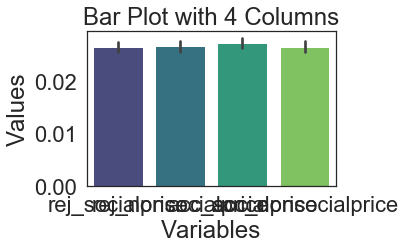

In [33]:

# Prepare data for plotting
fourbarplot_melted = fourbarplot.melt(var_name='ConditionxType', value_name='Price')

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=fourbarplot_melted, x='ConditionxType', y='Price', palette='viridis')

# Customize the plot
plt.title('Bar Plot with 4 Columns')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.tight_layout()

# Show the plot
plt.show()


In [34]:
nonsocialspent_mean = shortformdata['nonsocial_decisionprice_mean'].mean()
socialspent_mean = shortformdata['social_decisionprice_mean'].mean()
                                 
print(nonsocialspent_mean)
print(socialspent_mean)
print()
print(rej['nonsocial_decisionprice_mean'].mean())
print(acc['nonsocial_decisionprice_mean'].mean())
print()
print(rej['social_decisionprice_mean'].mean())
print(acc['social_decisionprice_mean'].mean())



0.026691435065507408
0.026975444776150704

0.02677565626836874
0.02660721386264608

0.026626701075337825
0.027324188476963576


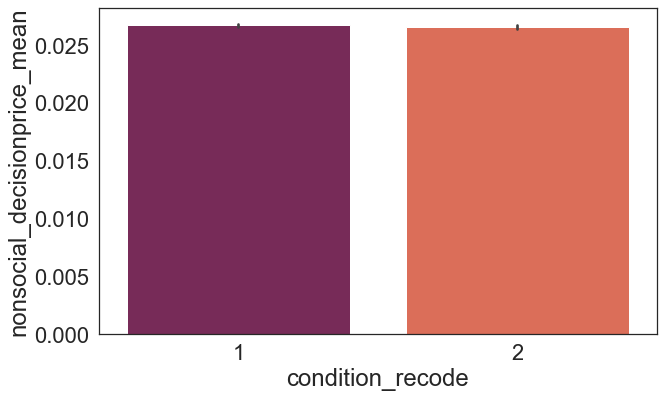

In [35]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
totalspent_nonsocial = sns.barplot(x='condition_recode', y='nonsocial_decisionprice_mean', palette='rocket',data= longformdata) #hue='order')#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
totalspent_nonsocial.figure.savefig('totalspent_nonsocial.png',bbox_inches='tight')

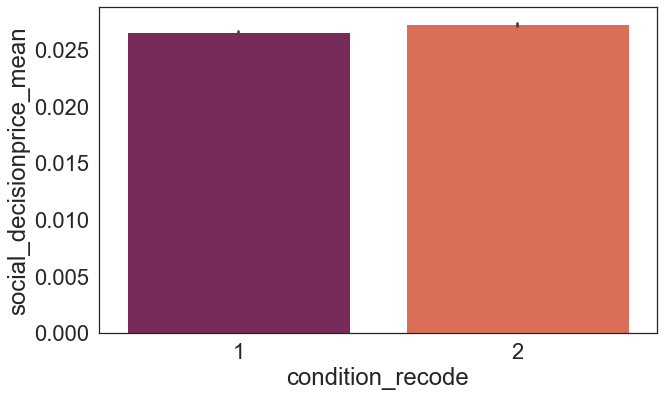

In [36]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
totalspent_social = sns.barplot(x='condition_recode', y='social_decisionprice_mean', palette='rocket',data= longformdata) #hue='order')#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
totalspent_social.figure.savefig('totalspent_social.png',bbox_inches='tight')

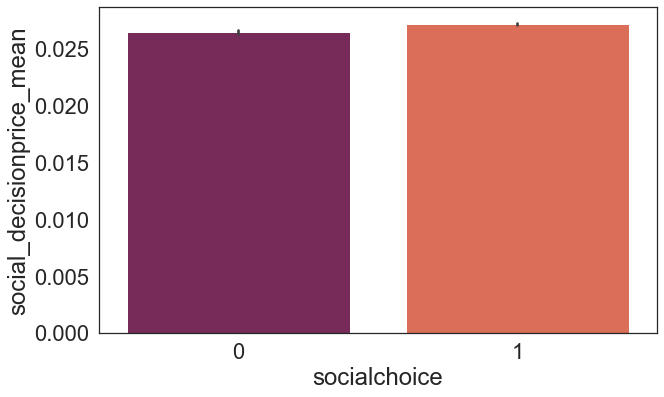

In [37]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
totalspent_social = sns.barplot(x='socialchoice', y='social_decisionprice_mean', palette='rocket',data= longformdata) #hue='order')#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
totalspent_social.figure.savefig('totalspent_social.png',bbox_inches='tight')

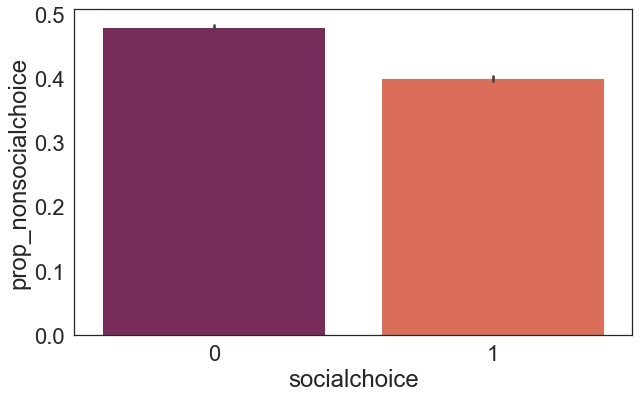

In [38]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
prop_social = sns.barplot(x='socialchoice', y='prop_nonsocialchoice', palette='rocket',data= longformdata) #hue='order')#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
prop_social.figure.savefig('prop_social.png',bbox_inches='tight')

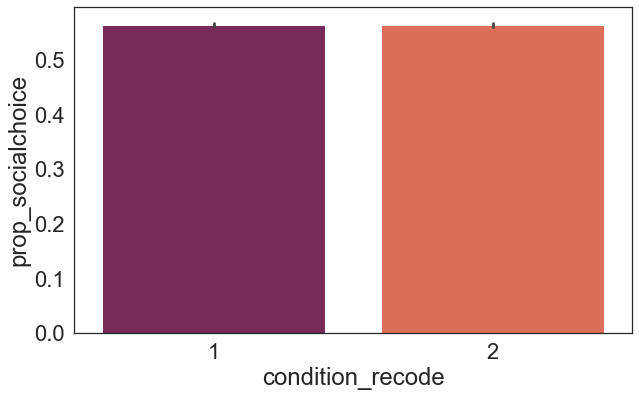

In [39]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
condition_propsocial = sns.barplot(x='condition_recode', y='prop_socialchoice', palette='rocket',data= longformdata) #hue='order')#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
condition_propsocial.figure.savefig('condition_propsocial.png',bbox_inches='tight')

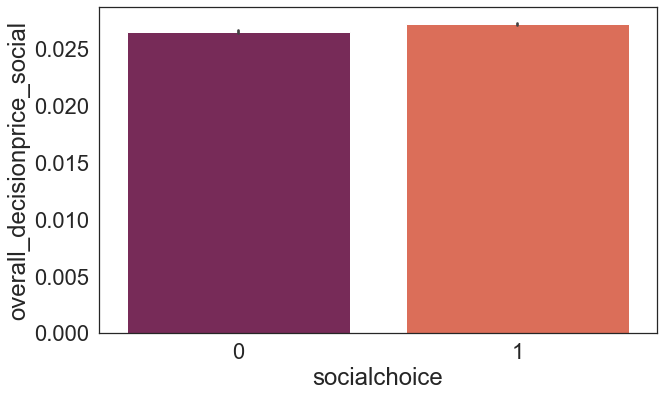

In [40]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
overallspent_social = sns.barplot(x='socialchoice', y='overall_decisionprice_social', palette='rocket',data= longformdata) #hue='order')#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
overallspent_social.figure.savefig('overallspent_social.png',bbox_inches='tight')

,overall_social,overall_nonsocial
0,0.026972,0.026811


<bound method NDFrame._add_numeric_operations.<locals>.mean of 0    0.026972
Name: overall_social, dtype: float64>
<bound method NDFrame._add_numeric_operations.<locals>.mean of 0    0.026811
Name: overall_nonsocial, dtype: float64>


<Figure size 720x432 with 0 Axes>

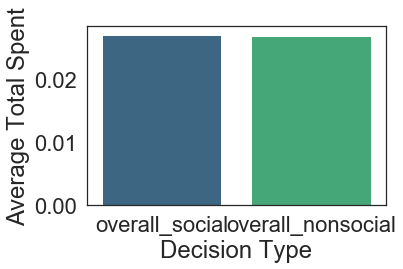

In [41]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')

twobarplot = pd.DataFrame()

twobarplot['overall_social'] = [rej['overall_decisionprice_social'].mean()]
twobarplot['overall_nonsocial'] = [rej['overall_decisionprice_nonsocial'].mean()]

display(twobarplot)


print(twobarplot['overall_social'].mean)
print(twobarplot['overall_nonsocial'].mean)

# Prepare data for plotting
twobarplot_melted = twobarplot.melt(var_name='Decision Type', value_name='Price')

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=twobarplot_melted, x='Decision Type', y='Price', palette='viridis')

# Customize the plot
plt.title('')
plt.ylabel('Average Total Spent')
plt.xlabel('Decision Type')
plt.tight_layout()

# Show the plot
plt.show()

0    0.562956
Name: acc_propsocial, dtype: float64
0    0.563912
Name: rej_propsocial, dtype: float64


<Figure size 720x432 with 0 Axes>

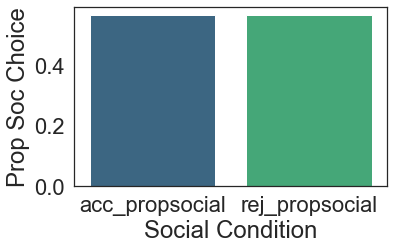

In [42]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')

propsoc_bycondition = pd.DataFrame()

propsoc_bycondition['acc_propsocial'] = [acc['prop_socialchoice'].mean()]
propsoc_bycondition['rej_propsocial'] = [rej['prop_socialchoice'].mean()]

print(propsoc_bycondition['acc_propsocial'])
print(propsoc_bycondition['rej_propsocial'])

# Prepare data for plotting
propsoc_bycondition_melted = propsoc_bycondition.melt(var_name='Social Condition', value_name='Proportion Social Choice')

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=propsoc_bycondition_melted, x='Social Condition', y='Proportion Social Choice', palette='viridis')

# Customize the plot
plt.title('')
plt.ylabel('Prop Soc Choice')
plt.xlabel('Social Condition')
plt.tight_layout()

# Show the plot
plt.show()

0    0.027101
Name: acc_decision_price, dtype: float64
0    0.026854
Name: rej_decision_price, dtype: float64


<Figure size 720x432 with 0 Axes>

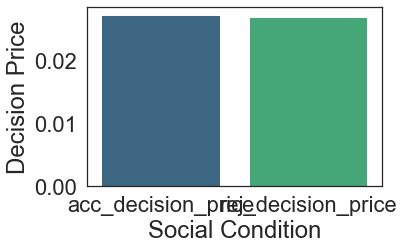

In [43]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')

decisionprice_bycondition = pd.DataFrame()

decisionprice_bycondition['acc_decision_price'] = [acc_long['decision_price'].mean()]
decisionprice_bycondition['rej_decision_price'] = [rej_long['decision_price'].mean()]

print(decisionprice_bycondition['acc_decision_price'])
print(decisionprice_bycondition['rej_decision_price'])

# Prepare data for plotting
decisionprice_bycondition_melted = decisionprice_bycondition.melt(var_name='Social Condition', value_name='Mean Decision Price')

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=decisionprice_bycondition_melted, x='Social Condition', y='Mean Decision Price', palette='viridis')

# Customize the plot
plt.title('')
plt.ylabel('Decision Price')
plt.xlabel('Social Condition')
plt.tight_layout()

# Show the plot
plt.show()

0      0.480000
1      0.480000
2      0.420000
3      0.320000
4      0.340000
         ...   
193    0.387755
194    0.620000
195    0.469388
196    0.500000
197    0.500000
Name: prop_difference, Length: 198, dtype: float64
0       0.48
1       0.48
2       0.48
3       0.48
4       0.48
        ... 
9644    0.50
9645    0.50
9646    0.50
9647    0.50
9648    0.50
Name: prop_difference, Length: 9649, dtype: float64


In [51]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')

prop_difference = pd.DataFrame()
print(prop_difference)



Empty DataFrame
Columns: []
Index: []


<Figure size 720x432 with 0 Axes>

0    0.436025
Name: acc_prop_difference, dtype: float64
0    0.435983
Name: rej_prop_difference, dtype: float64


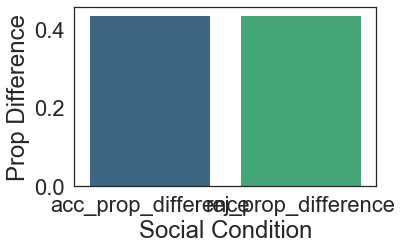

In [55]:
prop_difference['acc_prop_difference'] = [acc_long['prop_difference'].mean()]
prop_difference['rej_prop_difference'] = [rej_long['prop_difference'].mean()]

print(prop_difference['acc_prop_difference'])
print(prop_difference['rej_prop_difference'])

# Prepare data for plotting
prop_difference_melted = prop_difference.melt(var_name='Social Condition', value_name='Prop Difference')

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=prop_difference_melted, x='Social Condition', y='Prop Difference', palette='viridis')

# Customize the plot
plt.title('')
plt.ylabel('Prop Difference')
plt.xlabel('Social Condition')
plt.tight_layout()

# Show the plot
plt.show()

0    0.563434
Name: prop_social, dtype: float64
0    0.436566
Name: prop_nonsocial, dtype: float64


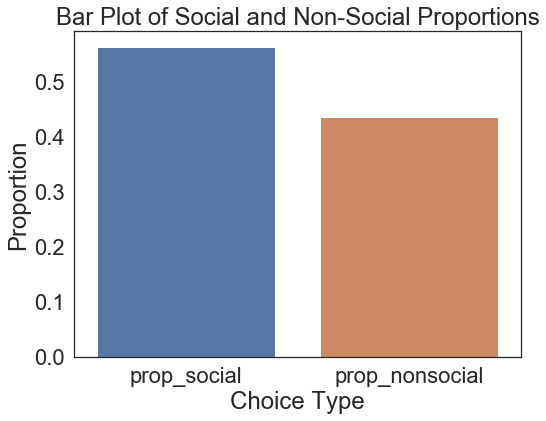

In [76]:
overallprop = pd.DataFrame()
overallprop['prop_social'] = [shortformdata['prop_socialchoice'].mean()]
overallprop['prop_nonsocial'] = [shortformdata['prop_difference'].mean()]

print(overallprop['prop_social'])
print(overallprop['prop_nonsocial'])


# Melt the DataFrame to long format
overallprop_melted = overallprop.melt(value_vars=['prop_social', 'prop_nonsocial'], 
                                      var_name='Choice Type', value_name='Proportion')

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=overallprop_melted, x='Choice Type', y='Proportion', ci=sem)

# Customizing the plot
plt.title('Bar Plot of Social and Non-Social Proportions')
plt.xlabel('Choice Type')
plt.ylabel('Proportion')
plt.show()


In [88]:
sem_propsocial = np.std(rej['prop_socialchoice'], ddof=98) / np.sqrt(len(rej['prop_socialchoice']))  # ddof=1 for sample standard deviation
print("Standard Error:", sem)

sem_propnonsocial = np.std(rej['prop_difference'], ddof=98) / np.sqrt(len(rej['prop_difference']))  # ddof=1 for sample standard deviation
print("Standard Error:", sem)

Standard Error: 0.13915657372304005
Standard Error: 0.13915657372304005


0    0.563434
Name: prop_social, dtype: float64
0    0.436566
Name: prop_nonsocial, dtype: float64


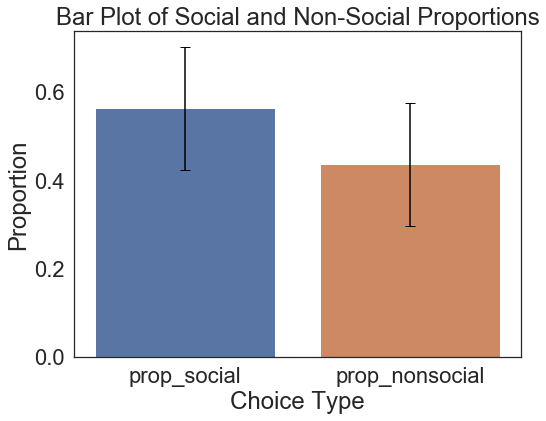

In [89]:
overallprop = pd.DataFrame()
overallprop['prop_social'] = [shortformdata['prop_socialchoice'].mean()]
overallprop['prop_nonsocial'] = [shortformdata['prop_difference'].mean()]

print(overallprop['prop_social'])
print(overallprop['prop_nonsocial'])


# Melt the DataFrame to long format
overallprop_melted = overallprop.melt(value_vars=['prop_social', 'prop_nonsocial'], 
                                      var_name='Choice Type', value_name='Proportion')

se_values = [sem_propsocial, sem_propnonsocial]

# Plot with error bars
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=overallprop_melted, x='Choice Type', y='Proportion', ci=None)  # ci=None to use manual errors
plt.errorbar(x=[0, 1], y=overallprop_melted['Proportion'], yerr=se_values, fmt='none', capsize=5, color='black')


# Customizing the plot
plt.title('Bar Plot of Social and Non-Social Proportions')
plt.xlabel('Choice Type')
plt.ylabel('Proportion')
plt.show()